# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from utils.detector import Detector

# 2. Call detector class

In [2]:
mp_detect = Detector()

In [ ]:
# for testing

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# 3. Setup Folders for Collection

In [3]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Dataset_Keypoints_start_record2')
# DATA_PATH = os.path.join('Dataset_Keypoints_Data_wo_face_sintetic') 

# Actions that we try to detect
actions = np.array(['start', 'continue'])
actions2 = np.array(['halo', 'nama', 'aku', 'perkenalkan', 'r', 'kami', 'd', 'a', 'n', 'i', 'y', 'l', 'u', 'g', 'm', 'NOTHING'])

# 140 videos worth of data
no_sequences = 150

# Videos are going to be 50 frames in length
sequence_length = 5

# Folder start
# start_folder = 1

In [4]:
# for action in actions: 
# dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, '1'))).astype(int))
for action in actions: 
    for sequence in range(2250):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 4. Collect Keypoint Values for Training and Testing

In [6]:
# actions = np.array(['halo', 'nama', 'aku', 'perkenalkan', 'r', 'kami', 'd', 'a', 'n', 'i', 'y', 'l', 'u', 'g', 'm', 'NOTHING'])
# actions = np.array(['halo'])

In [5]:
sq = 0
sequence_length = 10
for i in range(15):
    # sequence_length = 32
    
    for sequence in range(150):
        print('start {}, ke {}'.format(actions2[i], sequence+1))
        cap = cv2.VideoCapture("F:/Work/2022/ifest-bisindo-translator/ml/dataset/{}/{}.mp4".format(actions2[i], sequence))
        sequence += sq
        with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            for frame_num in range(sequence_length):
                if frame_num > sequence_length-6:
                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mp_detect.mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    # mp_detect.draw_styled_landmarks(image, results)
                    
                    keypoints = mp_detect.extract_keypoints_only_handpose(results)
                    # 
                    npy_path = os.path.join(DATA_PATH, str('start'), str(sequence), str(frame_num-(sequence_length-7+2)))
                    np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                        
        cap.release()
        cv2.destroyAllWindows()
    sq+=150
    # sequence_length+=6

start halo, ke 1
start halo, ke 2
start halo, ke 3
start halo, ke 4
start halo, ke 5
start halo, ke 6
start halo, ke 7
start halo, ke 8
start halo, ke 9
start halo, ke 10
start halo, ke 11
start halo, ke 12
start halo, ke 13
start halo, ke 14
start halo, ke 15
start halo, ke 16
start halo, ke 17
start halo, ke 18
start halo, ke 19
start halo, ke 20
start halo, ke 21
start halo, ke 22
start halo, ke 23
start halo, ke 24
start halo, ke 25
start halo, ke 26
start halo, ke 27
start halo, ke 28
start halo, ke 29
start halo, ke 30
start halo, ke 31
start halo, ke 32
start halo, ke 33
start halo, ke 34
start halo, ke 35
start halo, ke 36
start halo, ke 37
start halo, ke 38
start halo, ke 39
start halo, ke 40
start halo, ke 41
start halo, ke 42
start halo, ke 43
start halo, ke 44
start halo, ke 45
start halo, ke 46
start halo, ke 47
start halo, ke 48
start halo, ke 49
start halo, ke 50
start halo, ke 51
start halo, ke 52
start halo, ke 53
start halo, ke 54
start halo, ke 55
start halo, ke 56
s

In [21]:
sq = 2095
  
for sequence in range(3):
    print('start video ke {}'.format(sequence))
    sequence_length = 5+4+2 
    for i in range(25):
        cap = cv2.VideoCapture("F:/Work/2022/ifest-bisindo-translator/ml/additional_nothing_dataset/{}.mp4".format(sequence))
        # sequence += sq
        with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            for frame_num in range(sequence_length):
                if frame_num > sequence_length-6:
                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mp_detect.mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    # mp_detect.draw_styled_landmarks(image, results)
                    
                    keypoints = mp_detect.extract_keypoints_only_handpose(results)
                    # 
                    npy_path = os.path.join(DATA_PATH, str('continue'), str(sq), str(frame_num-(sequence_length-7+2)))
                    np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break                
            cap.release()
            cv2.destroyAllWindows()
        sq+=1
        sequence_length+=7

print("last sequence = {}".format(sq))

start video ke 0
start video ke 1
start video ke 2
last sequence = 2170


In [23]:
print(keypoints)


[ 0.52671254  0.23856722 -0.6998564  ...  0.          0.
  0.        ]


# 5. Preprocess Data and Create Labels and Features

In [91]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [92]:
actions = np.array(['start', 'continue'])

In [93]:
label_map = {label:num for num, label in enumerate(actions)}

In [94]:
label_map

{'start': 0, 'continue': 1}

In [95]:
DATA_PATH = os.path.join('Dataset_Keypoints_start_record') 
sequences, labels = [], []
for action in actions:
    for sequence in range(2250):
        window = []
        for frame_num in range(4):
            # res = np.load("F:/Work/2022/ifest-bisindo-translator/ml/Dataset_Keypoints_Data/{}/{}.npy".format(action, frame_num))
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [96]:
np.array(sequences).shape

(4500, 4, 48)

In [97]:
np.array(labels).shape

(4500,)

In [98]:
X = np.array(sequences)

In [99]:
X.shape

(4500, 4, 48)

In [100]:
y = to_categorical(labels).astype(int)

In [101]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

In [102]:
y_test.shape

(900, 2)

In [103]:
y_val.shape

(900, 2)

In [22]:
__dataname = ['X_test', 'y_test', 'X_train', 'X_val', 'y_train', 'y_val']
__data = [X_test,y_test, X_train, X_val, y_train, y_val]

for i in range(6):
    with open('{}.txt'.format(__dataname[i]), 'w') as f:
        f.write(__dataname[i])

In [70]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, train_size=0.5, shuffle=True)
x_train_ = [X_train1, X_train2]
y_train_ = [y_train1, y_train2]

In [90]:
DATA_PATH = os.path.join('Dataset_Keypoints_Data_wo_face_sintetic') 
sequences2, labels2 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(45):
            # res = np.load("F:/Work/2022/ifest-bisindo-translator/ml/Dataset_Keypoints_Data/{}/{}.npy".format(action, frame_num))
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences2.append(window)
        labels2.append(label_map[action])

In [91]:
y_train_2 = to_categorical(labels2).astype(int)
X_train_2 = np.array(sequences2)

# 7. Build and Train LSTM Neural Network

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import TensorBoard, Callback
from tensorflow.keras.optimizers import Adam

In [106]:
class trainingCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    
    # Check accuracy
    # if(logs.get('categorical_accuracy') < 0.95  and logs.get('loss') < 0.35 and logs.get('val_loss') < 0.35):
    if((logs.get('categorical_accuracy') > 0.98) or (logs.get('categorical_accuracy') > 0.97  and logs.get('loss') > logs.get('val_loss'))):
      # Stop if threshold is met
      print("\nAccuracy grater than 0.95 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = trainingCallback()

In [107]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [108]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(4,48)))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=True, activation='relu'))
# model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(actions.shape[0], activation='softmax'))

In [109]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [110]:
# model_train = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_val,y_val), callbacks=[tb_callback])
model_train = model.fit(X_train, y_train, epochs=1000, batch_size=64,validation_data=(X_val,y_val), callbacks=[callbacks])
# model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
43/43 [==============================] - 9s 55ms/step - loss: 0.6669 - categorical_accuracy: 0.5589 - val_loss: 0.5702 - val_categorical_accuracy: 0.6811
Epoch 2/1000
43/43 [==============================] - 1s 35ms/step - loss: 0.5227 - categorical_accuracy: 0.7189 - val_loss: 0.4630 - val_categorical_accuracy: 0.7444
Epoch 3/1000
43/43 [==============================] - 1s 32ms/step - loss: 0.4596 - categorical_accuracy: 0.7659 - val_loss: 0.4407 - val_categorical_accuracy: 0.7822
Epoch 4/1000
43/43 [==============================] - 1s 31ms/step - loss: 0.4264 - categorical_accuracy: 0.7822 - val_loss: 0.3952 - val_categorical_accuracy: 0.7967
Epoch 5/1000
43/43 [==============================] - 1s 32ms/step - loss: 0.3840 - categorical_accuracy: 0.8063 - val_loss: 0.3680 - val_categorical_accuracy: 0.8100
Epoch 6/1000
43/43 [==============================] - 1s 32ms/step - loss: 0.3615 - categorical_accuracy: 0.8289 - val_loss: 0.3800 - val_categorical_accuracy: 0.814

In [162]:
loss, val_loss, cat_accuracy = [], [], []
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
for _epochs in range(400):
    count = _epochs % 12
    if (count < 10 and (_epochs < 150 or (_epochs < 250 and _epochs > 200))):
        if (count < 4):
            x_train__ = x_train_[0]
            y_train__ = y_train_[0]
        elif (count < 8):
            x_train__ = x_train_[1]
            y_train__ = y_train_[1]
        elif (count < 10):
            x_train__ = X_train_2
            y_train__ = y_train_2
    else :
        x_train__ = X_train
        y_train__ = y_train
    model_train = model.fit(x_train__, y_train__, epochs=_epochs+1, batch_size=64,validation_data=(X_val,y_val),initial_epoch=_epochs)
    _loss = model_train.history['loss']
    _val_loss = model_train.history['val_loss']
    _cat_accuracy = model_train.history['categorical_accuracy']
    loss.append(_loss[len(_loss)-1])
    val_loss.append(_val_loss[len(_loss)-1])
    cat_accuracy.append(_cat_accuracy[len(_loss)-1])
    if (loss[len(loss)-1] < val_loss[len(loss)-1] and cat_accuracy[len(loss)-1] > 0.96):
        break





16/16 [==============================] - 6s 181ms/step - loss: 2.7854 - categorical_accuracy: 0.0669 - val_loss: 2.7371 - val_categorical_accuracy: 0.1111
Epoch 2/2
16/16 [==============================] - 2s 157ms/step - loss: 2.7644 - categorical_accuracy: 0.0874 - val_loss: 2.7248 - val_categorical_accuracy: 0.1574
Epoch 3/3
16/16 [==============================] - 2s 154ms/step - loss: 2.7456 - categorical_accuracy: 0.0844 - val_loss: 2.7046 - val_categorical_accuracy: 0.2176
Epoch 4/4
16/16 [==============================] - 2s 153ms/step - loss: 2.7287 - categorical_accuracy: 0.1080 - val_loss: 2.6815 - val_categorical_accuracy: 0.2222
Epoch 5/5
16/16 [==============================] - 2s 155ms/step - loss: 2.7080 - categorical_accuracy: 0.0988 - val_loss: 2.6286 - val_categorical_accuracy: 0.2500
Epoch 6/6
16/16 [==============================] - 3s 166ms/step - loss: 2.6854 - categorical_accuracy: 0.1142 - val_loss: 2.5734 - val_categorical_accuracy: 0.2593
Epoch 7/7
16/16 [===

In [111]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 4, 64)             28928     
                                                                 
 dropout_21 (Dropout)        (None, 4, 64)             0         
                                                                 
 lstm_15 (LSTM)              (None, 4, 128)            98816     
                                                                 
 lstm_16 (LSTM)              (None, 4, 64)             49408     
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dropout_22 (Dropout)        (None, 64)               

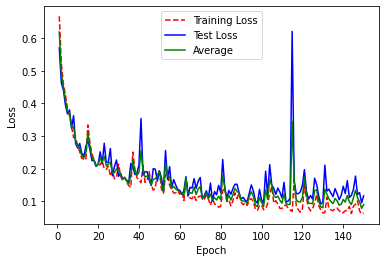

In [112]:
# Get training and test loss histories
training_loss = model_train.history['loss']
test_loss = model_train.history['val_loss']
avg = []

for i in range(len(training_loss)):
    sum = training_loss[i]+test_loss[i]
    avg.append(sum/2)

# avg = np.array([training_loss, test_loss])
# np.average(avg)

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.plot(epoch_count, avg, 'g-')
plt.legend(['Training Loss', 'Test Loss', 'Average'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# print(avg)

# 8. Make Predictions

In [75]:
res = model.predict(X_test)

15/15 [==============================] - 2s 12ms/step


In [76]:
actions[np.argmax(res[3])]

'continue'

In [77]:
actions[np.argmax(y_test[3])]

'continue'

# 9. Save Weights

In [113]:
model.save('model_start_detection.h5')

In [217]:
del model

In [29]:
model.load_weights('model_2.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [114]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [115]:
yhat = model.predict(X_test)

29/29 [==============================] - 2s 11ms/step


In [116]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [117]:
confussionMatrix = multilabel_confusion_matrix(ytrue, yhat)
from sklearn.metrics import confusion_matrix
confussionMatrix = confusion_matrix(ytrue, yhat)

In [110]:
print(confussionMatrix)
with open('confussionMatrixModel_2.txt', 'w') as f:
    f.write(str(confussionMatrix))

[[[228   0]
  [  0  12]]

 [[222   0]
  [  2  16]]

 [[226   0]
  [  1  13]]

 [[224   2]
  [  0  14]]

 [[220   5]
  [  0  15]]

 [[227   0]
  [  2  11]]

 [[226   1]
  [  1  12]]

 [[217   0]
  [  2  21]]

 [[223   5]
  [  0  12]]

 [[220   0]
  [  2  18]]

 [[230   1]
  [  0   9]]

 [[222   2]
  [  4  12]]

 [[224   2]
  [  2  12]]

 [[223   0]
  [  0  17]]

 [[223   2]
  [  4  11]]

 [[225   0]
  [  0  15]]]


In [118]:
accuracy = accuracy_score(ytrue, yhat)
print(accuracy)
# with open('accuracyScoreModel_2.txt', 'w') as f:
#     f.write(str(accuracy))

0.9711111111111111


In [119]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytrue, yhat, target_names=actions))


Classification Report

              precision    recall  f1-score   support

       start       1.00      0.94      0.97       421
    continue       0.95      1.00      0.97       479

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



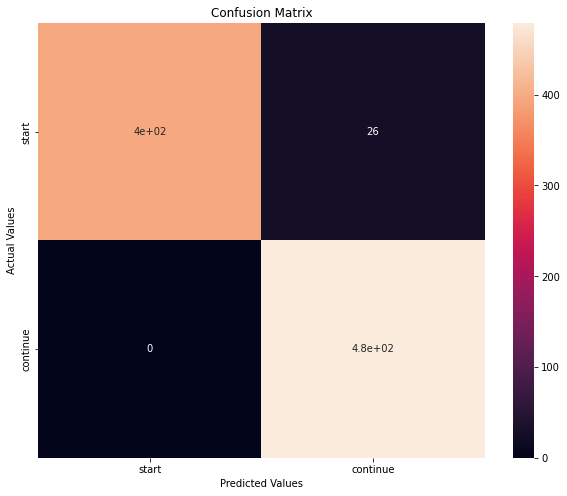

In [120]:
import pandas as pd
cm_df = pd.DataFrame(confussionMatrix,
                     index = actions, 
                     columns = actions)

import seaborn as sns
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


# 11. Test in Real Time

In [121]:
from scipy import stats

In [122]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [220]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [126]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mp_detect.mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        mp_detect.draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = mp_detect.extract_keypoints_only_handpose(results)
        sequence.append(keypoints)
        sequence = sequence[-4:]
        
        if len(sequence) == 4:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            # if np.unique(predictions[-10:])[0]==np.argmax(res): 
            #     if res[np.argmax(res)] > threshold: 
                    
            #         if len(sentence) > 0: 
            #             if actions[np.argmax(res)] != sentence[-1]:
            #                 sentence.append(actions[np.argmax(res)])
            #         else:
            sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        # cv2.rectangle(image, (0,0), (320, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
start
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
start
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
start
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
start
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
start
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
start
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
start
<class 'mediapipe.python